In [43]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.3)
import pandas as pd
import warnings
import sys

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
DataFolder = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/'
SaveFiguresFolder ='/home/sheffieldlab/Desktop/NoReward/PaperFigures/Figure2/'

In [45]:
# For plotting styles
PlottingFormat_Folder = '/home/sheffieldlab/Desktop/NoReward/Scripts/PlottingTools/'
sys.path.append(PlottingFormat_Folder)
import plottingfunctions as pf

In [3]:
from Bayes_runnsamemodel import CompileModelData, PValues

In [4]:
d = CompileModelData(DataFolder)

['CFC17', 'NR14', 'NR15', 'NR23', 'CFC4', 'NR32', 'NR6', 'CFC19', 'NR24', 'NR21', 'CFC16', 'NR34']


### Number of cells

Task1 and Task2: KStest : p-value 0.0000
Task1 and Task3: KStest : p-value 1.0220
Task1 and Task4: KStest : p-value 0.0000
Task2 and Task1: KStest : p-value 0.0000
Task2 and Task3: KStest : p-value 0.0056
Task2 and Task4: KStest : p-value 2.8431
Task3 and Task1: KStest : p-value 1.0220
Task3 and Task2: KStest : p-value 0.0056
Task3 and Task4: KStest : p-value 0.4513
Task4 and Task1: KStest : p-value 0.0000
Task4 and Task2: KStest : p-value 2.8431
Task4 and Task3: KStest : p-value 0.4513


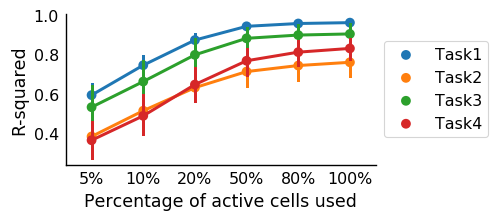

In [51]:
fs, ax = plt.subplots(1, sharex='all', dpi=100)
numcells_df = d.compile_numcells(ax, taskstoplot=['Task1', 'Task2', 'Task3', 'Task4'])
p_df  = PValues.pvalues_numcells_taskwise(numcells_df)
fs.set_size_inches((4, 2))
fs.savefig(os.path.join(SaveFiguresFolder, 'Numcells_eachtask_with_Task4.pdf'),  bbox_inches='tight', transparent=True)

Task1 and Task2: KStest : p-value 0.0000
Task1 and Task3: KStest : p-value 1.0220
Task1 and Task4: KStest : p-value 0.0000
Task2 and Task1: KStest : p-value 0.0000
Task2 and Task3: KStest : p-value 0.0056
Task2 and Task4: KStest : p-value 2.8431
Task3 and Task1: KStest : p-value 1.0220
Task3 and Task2: KStest : p-value 0.0056
Task3 and Task4: KStest : p-value 0.4513
Task4 and Task1: KStest : p-value 0.0000
Task4 and Task2: KStest : p-value 2.8431
Task4 and Task3: KStest : p-value 0.4513


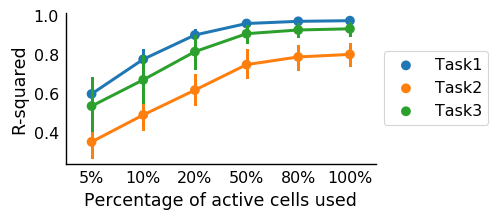

In [52]:
fs, ax = plt.subplots(1, sharex='all', dpi=100)
numcells_df_placecells = d.compile_numcells(ax, taskstoplot=['Task1', 'Task2', 'Task3'], placecellflag=1)
p_df  = PValues.pvalues_numcells_taskwise(numcells_df)
fs.set_size_inches((4, 2))
fs.savefig(os.path.join(SaveFiguresFolder, 'Numcells_eachtask_onlyplacecells.pdf'),  bbox_inches='tight', transparent=True)

In [32]:
compiled_numcell_df = pd.concat((numcells_df, numcells_df_placecells))

0.111
0.253
0.235
0.450


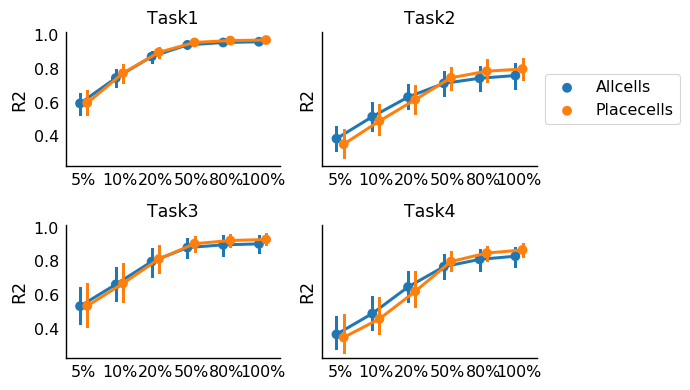

In [67]:
fs, ax = plt.subplots(2, 2, sharey='all', dpi=100)
ax = ax.flatten()
percsamples = [5, 10, 20, 50, 80, 100]
percsamples = [f'%d%%' % p for p in percsamples]

for n, t in enumerate(['Task1', 'Task2', 'Task3', 'Task4']):
    sns.pointplot(x='SampleSize', y='R2_angle', 
                  data=compiled_numcell_df[compiled_numcell_df.Task == t], 
                  order=percsamples, hue = 'Type', dodge=0.2,
                    ax=ax[n], markerfacecolor='none')
    if n != 1:
        ax[n].get_legend().remove()
    else:
        ax[n].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[n].set_title(t)
    ax[n].set_xlabel('')
    ax[n].set_ylabel('R2')
    t, p = scipy.stats.ks_2samp(numcells_df[numcells_df.Task == t]['R2_angle'],
                               numcells_df_placecells[numcells_df_placecells.Task == t]['R2_angle'])
    print('%0.3f' %p)
    
for a in ax:
    pf.set_axes_style(a)
fs.set_size_inches((7, 4))
fs.tight_layout()
fs.savefig(os.path.join(SaveFiguresFolder, 'Numcells_eachtask_allcellsvspcs.pdf'),  bbox_inches='tight', transparent=True)

### Error with track position

#### Control

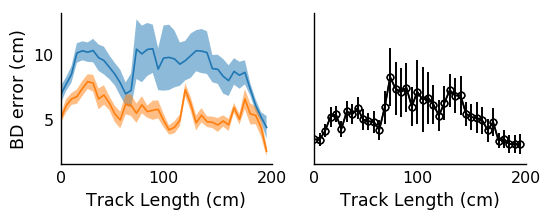

In [6]:
fs, ax = plt.subplots(1, 2, sharex='all', sharey='all', dpi=100)
ControlFolder = '/home/sheffieldlab/Desktop/NoReward/ControlData/Dataused/'
diff_cntrl = d.compile_meanerror_bytrack_incontrols(ControlFolder, ax)
fs.set_size_inches((6, 2))

#### Experiment

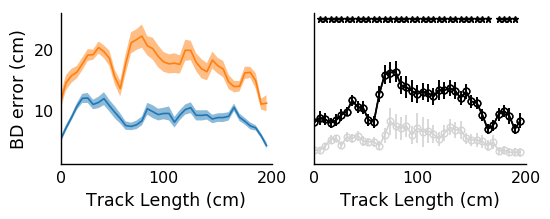

In [10]:
fs, ax = plt.subplots(1, 2, sharex='all', sharey='all', dpi=100)
diff_exp = d.compile_meanerror_bytrack(ax, taskstoplot=['Task1', 'Task2'])
meandiff, semdiff = np.nanmean(diff_cntrl, 0), scipy.stats.sem(diff_cntrl, 0, nan_policy='omit')
ax[1].errorbar(np.arange(np.size(meandiff)), meandiff, yerr=semdiff, marker='o', markerfacecolor='none',
               color='lightgrey')

for i in np.arange(np.size(diff_exp, 1)):
    t, p = scipy.stats.ttest_ind(diff_exp[:, i], diff_cntrl[:, i])
#     print('%d %0.3f' %(i, p))
    if p<0.05:
        ax[1].plot(i, 25, 'k*')
        
fs.set_size_inches((6, 2))
fs.savefig(os.path.join(SaveFiguresFolder, 'Errorbytracklength_difference_withcontrol.pdf'),  bbox_inches='tight', transparent=True)

### Differences between first and last lap per animal

P-value Task1_Beg and Task1_End is 0.018
P-value Task2_Beg and Task2_End is 0.529
P-value Task3_Beg and Task3_End is 0.020
P-value Task4_Beg and Task4_End is 0.004


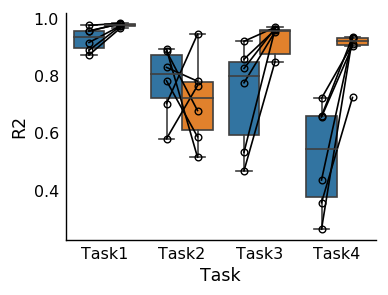

In [81]:
fs, ax = plt.subplots(1, sharex='all', dpi=100)
a = d.plot_error_bytime(ax, taskstoplot=['Task1', 'Task2', 'Task3', 'Task4'])
fs.set_size_inches((4, 3))
fs.savefig(os.path.join(SaveFiguresFolder, 'Boxplot_beg_end_laps_alltasks.pdf'),  bbox_inches='tight', transparent=True)